In [1]:
%matplotlib notebook

from IPython.display import Image
from simplify.face_lattice import *
from simplify.simplify import *
from simplify.plot import *
from simplify.homothety import *
from islpy import *
from IPython.display import Image
import networkx as nx
import graphviz as gv
from islplot.support import *
import islplot.plotter as islp

dom = BasicSet('[M,N] -> { [i,j] : N=10 and M=15 }')

chambers:
[M, N] -> { rat:  : 1 <= N <= -1 + M }


<IPython.core.display.Javascript object>


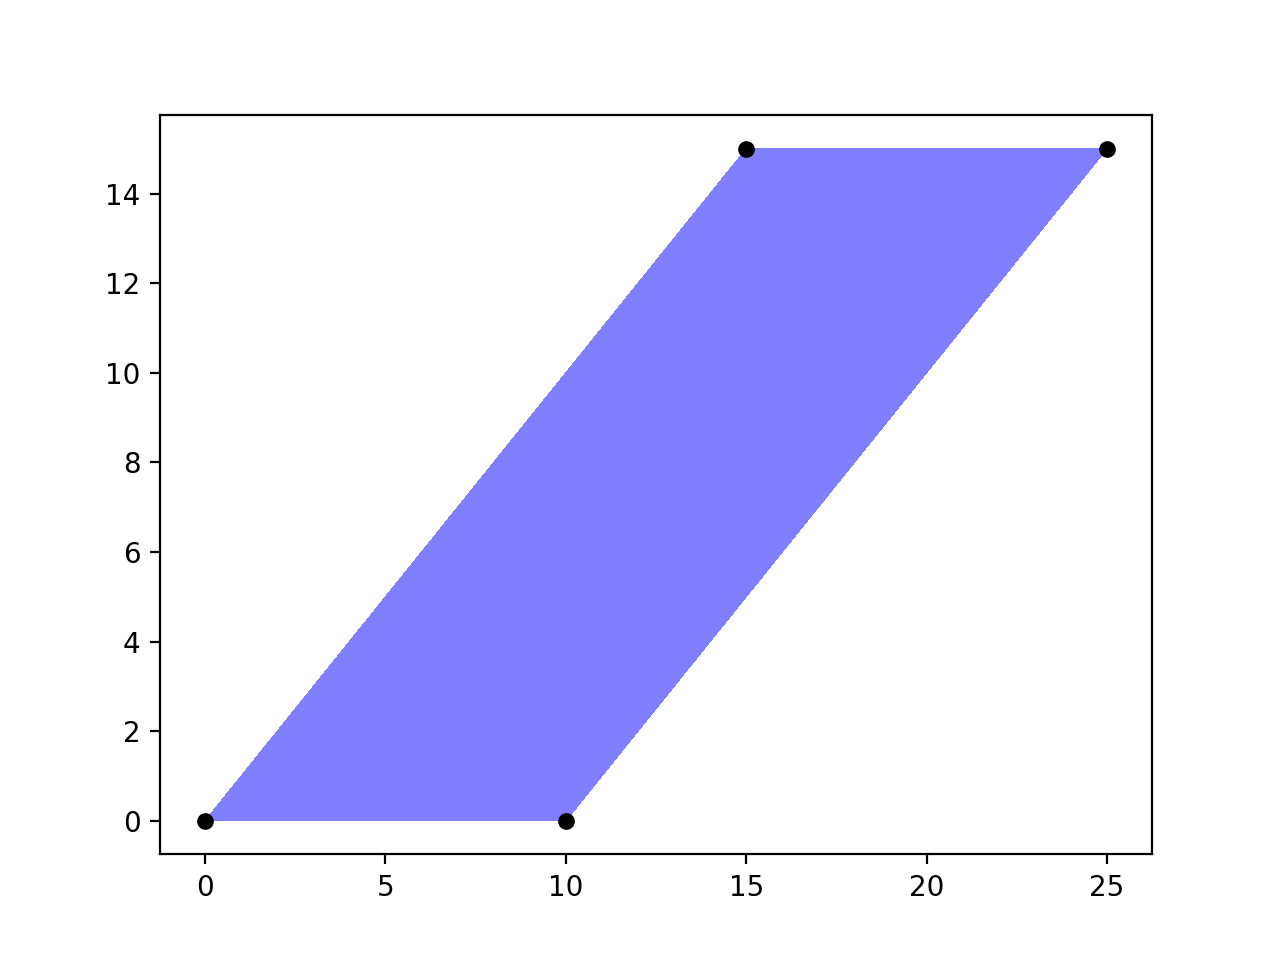

In [2]:
bset = BasicSet('[M,N] -> { [i,j] : 0<N<M and i,j>=0 and -N+i<=j<=i and j<=M }')
l0 = FaceLattice(bset=bset)
print('chambers:')
for chamber in l0.chambers:
    print(chamber.get_domain())

islp.plot_bset_shape(bset.intersect(dom), figure=islp._plt.figure())

chambers:
[M, N] -> { rat:  : 1 <= N <= -1 + M }


<IPython.core.display.Javascript object>


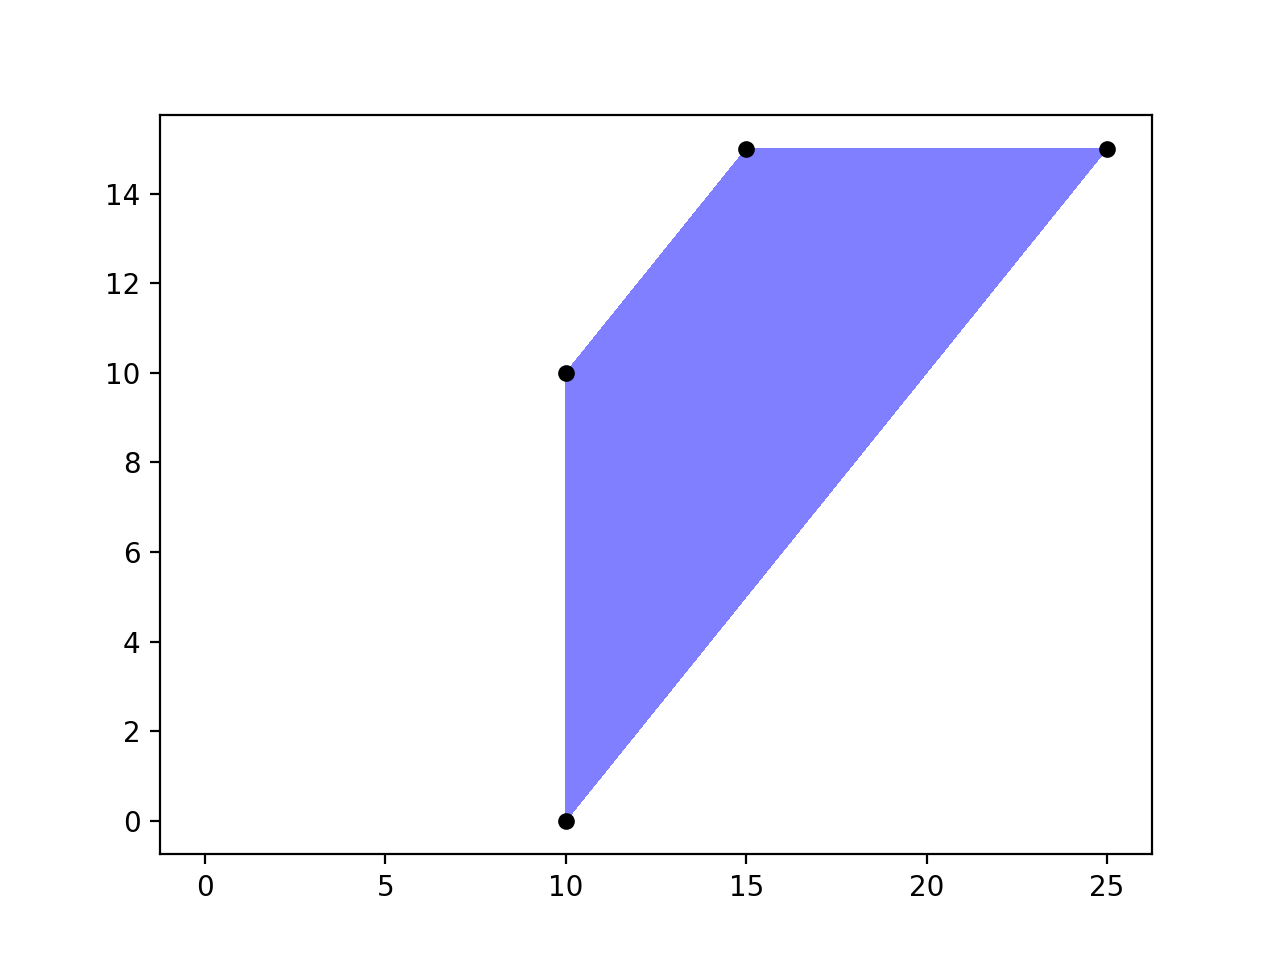

In [3]:
c = Constraint.inequality_from_aff(Aff.read_from_str(bset.get_ctx(), '[M,N]->{[i,j]->[(i-N)]}'))
l1 = FaceLattice(bset=bset.add_constraint(c))
print('chambers:')
for chamber in l1.chambers:
    print(chamber.get_domain())
islp.plot_bset_shape(l1.bset.intersect(dom), figure=islp._plt.figure())

chambers:
[M, N] -> { rat:  : 1 <= N <= -1 + M }


<IPython.core.display.Javascript object>


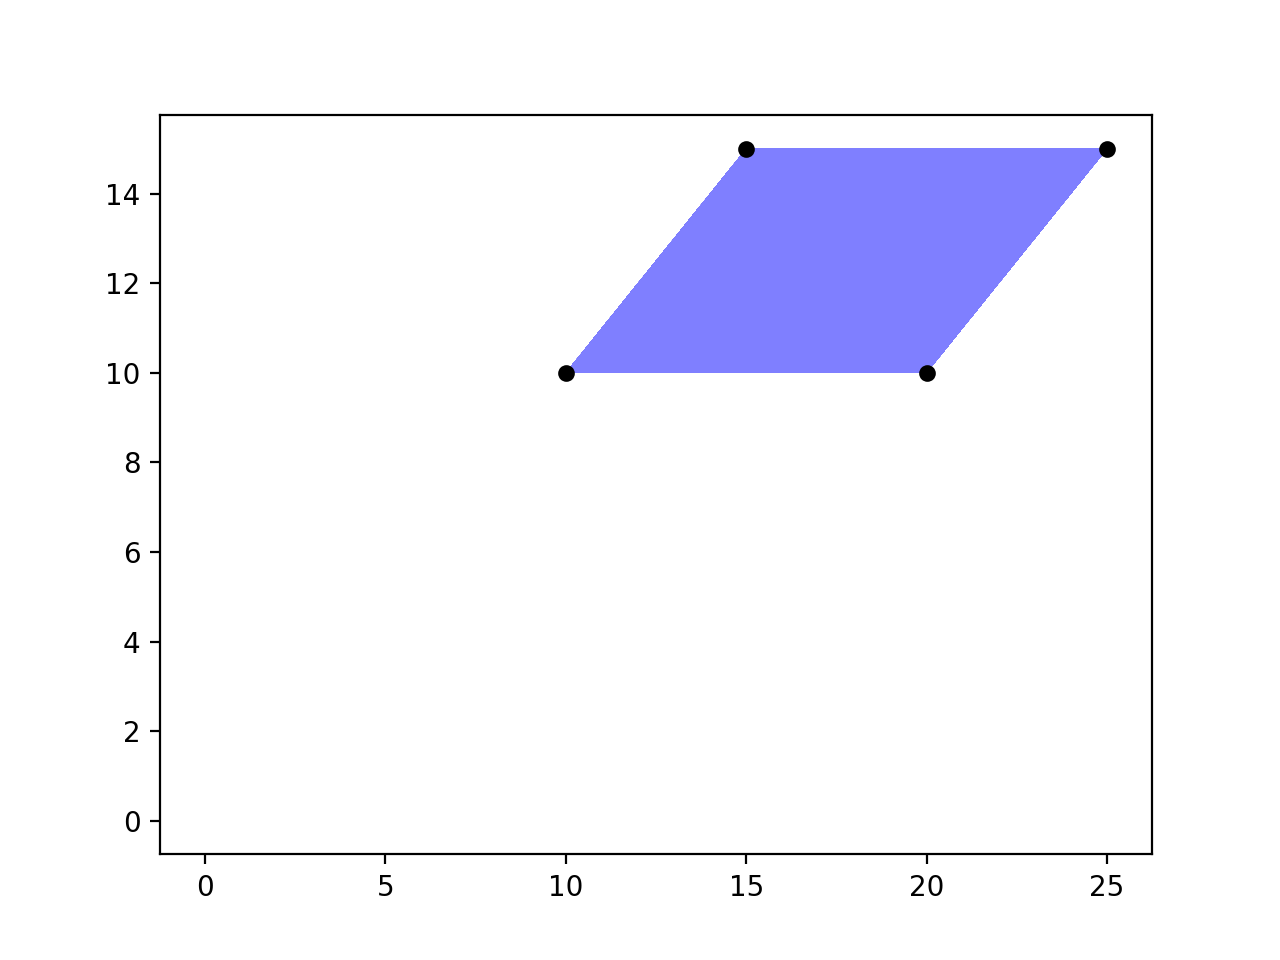

In [4]:
c = Constraint.inequality_from_aff(Aff.read_from_str(bset.get_ctx(), '[M,N]->{[i,j]->[(j-N)]}'))
l2 = FaceLattice(bset=l1.bset.add_constraint(c))
print('chambers:')
for chamber in l2.chambers:
    print(chamber.get_domain())
islp.plot_bset_shape(l2.bset.intersect(dom), figure=islp._plt.figure())

In [27]:
def no_params(l):
    A = []
    for c in l.bset.get_constraints():
        k = []
        aff = c.get_aff()
        for i in range(l.num_indices):
            k.append(aff.get_coefficient_val(dim_type.in_, i).to_python())
        A.append(k)
    A.sort()
    B = []
    for a in A:
        B += a
    print(B)
    return B

print('what makes these NOT similar...')
print(l0.bset)
print(l1.bset)
print()
print('...and these similar...')
print(l0.bset)
print(l2.bset)
print()
print('...?')

print()

print('what makes these NOT similar...')
nl0 = no_params(l0)
nl1 = no_params(l1)
print()
print('...and these similar...')
nl0 = no_params(l0)
nl2 = no_params(l2)
print()
print('...?')
print()

print('this is it! all of the coefficients excluding the params are the same!')
print(nl0 == nl1)
print(nl0 == nl2)

what makes these NOT similar...
[M, N] -> { [i, j] : 0 < N < M and j >= 0 and -N + i <= j <= i and j <= M }
[M, N] -> { [i, j] : 0 < N < M and i >= N and -N + i <= j <= i and j <= M }

...and these similar...
[M, N] -> { [i, j] : 0 < N < M and j >= 0 and -N + i <= j <= i and j <= M }
[M, N] -> { [i, j] : 0 < N < M and j >= N and -N + i <= j <= i and j <= M }

...?

what makes these NOT similar...
[-1, 1, 0, -1, 0, 0, 0, 0, 0, 1, 1, -1]
[-1, 1, 0, -1, 0, 0, 0, 0, 1, -1, 1, 0]

...and these similar...
[-1, 1, 0, -1, 0, 0, 0, 0, 0, 1, 1, -1]
[-1, 1, 0, -1, 0, 0, 0, 0, 0, 1, 1, -1]

...?

this is it! all of the coefficients excluding the params are the same!
False
True


## Todo

1. Make sure FaceLattice only processes (saturates) constraints involving indices
1. Is it possible for the number of chambers of the left or right split to be greater than that the parent?